In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
data_dir="Dataset"
categories=["bluecrown passion flower","cyclamen persicum","echinacea angustifolia","garden nasturtium","lotus","nuragica columbine","nymphaea loriana","philodendron gloriosum","spear thistle","tillandsia lagensis"]

In [2]:
training_data=[]
img_size=100
def create_training_data():
  for c in categories:
    path=os.path.join(data_dir,c)
    print(path)
    class_num=categories.index(c)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        #img_array=img_array/255
        new_array=cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_training_data()

Dataset\bluecrown passion flower
Dataset\cyclamen persicum
Dataset\echinacea angustifolia
Dataset\garden nasturtium
Dataset\lotus
Dataset\nuragica columbine
Dataset\nymphaea loriana
Dataset\philodendron gloriosum
Dataset\spear thistle
Dataset\tillandsia lagensis


In [3]:
print(len(training_data))
np.shape(training_data[0][0])

1225


(100, 100, 3)

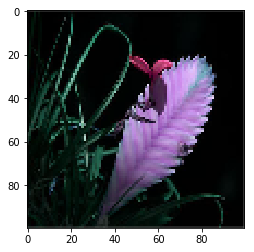

In [4]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1224][0])

In [5]:
import random
random.shuffle(training_data)
x_train=[]
y_train=[]
x_test=[]
y_test=[]
c=0
for image,classes in training_data:
  if(c<225):
    x_test.append(image)
    y_test.append(classes)
    c=c+1
    continue
  x_train.append(image)
  y_train.append(classes)

In [9]:
print(y_test[129])

9


In [10]:
x_train=np.array(x_train)
x_test=np.array(x_test)

In [12]:
import keras
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Using TensorFlow backend.


In [13]:
print(y_test[129])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [25]:
import os
import json

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import layers
from keras.applications import DenseNet121
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import Constant
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.python.ops import array_ops
from tqdm import tqdm

  
from keras import backend as K
import tensorflow as tf

In [26]:
from keras.applications import DenseNet121
from keras import layers
densenet = DenseNet121(
    weights='densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5',
    include_top=False,
    input_shape=(100,100,3)
)

In [27]:
model = Sequential()
model.add(densenet)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(10, activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 3, 3, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 7,047,754
Trainable params: 6,964,106
Non-trainable params: 83,648
_________________________________________________________________


In [29]:
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        X_val, y_val = self.validation_data[:2]
        y_pred = self.model.predict(X_val)

        y_pred_cat = keras.utils.to_categorical(
            y_pred.argmax(axis=1),
            num_classes=4
        )

        _val_f1 = f1_score(y_val, y_pred_cat, average='macro')
        _val_recall = recall_score(y_val, y_pred_cat, average='macro')
        _val_precision = precision_score(y_val, y_pred_cat, average='macro')

        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)

        print((f"val_f1: {_val_f1:.4f}"
               f" — val_precision: {_val_precision:.4f}"
               f" — val_recall: {_val_recall:.4f}"))

        return

f1_metrics = Metrics()

In [30]:
def step_down_20(epochs, crate):
    if ((epochs != 0) and (epochs%20 == 0)):
        crate = crate * 0.8
    return crate

In [31]:
import keras
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
       optimizer = self.model.optimizer
       lr_temp = step_down_20(optimizer.iterations,optimizer.lr)
       self.losses.append(logs.get('loss'))
       self.lr.append(lr_temp)

In [32]:
checkpoint_vl = ModelCheckpoint("weights.best_vl.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
checkpoint_va = ModelCheckpoint("weights.best_va.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint_va, checkpoint_vl]

Instructions for updating:
Use tf.cast instead.
Train on 1000 samples, validate on 225 samples
Epoch 1/10
1000/1000 [==============================] - ETA: 4:03:17 - loss: 3.0963 - acc: 0.08 - ETA: 2:10:49 - loss: 2.4194 - acc: 0.20 - ETA: 1:29:33 - loss: 2.1472 - acc: 0.29 - ETA: 1:07:21 - loss: 1.7926 - acc: 0.42 - ETA: 53:41 - loss: 1.6643 - acc: 0.4800 - ETA: 44:04 - loss: 1.5760 - acc: 0.50 - ETA: 37:32 - loss: 1.4368 - acc: 0.56 - ETA: 32:23 - loss: 1.3525 - acc: 0.57 - ETA: 28:41 - loss: 1.3180 - acc: 0.58 - ETA: 25:31 - loss: 1.2343 - acc: 0.61 - ETA: 22:46 - loss: 1.1689 - acc: 0.63 - ETA: 20:22 - loss: 1.1322 - acc: 0.64 - ETA: 18:19 - loss: 1.1428 - acc: 0.65 - ETA: 16:31 - loss: 1.0987 - acc: 0.66 - ETA: 15:03 - loss: 1.0541 - acc: 0.67 - ETA: 13:43 - loss: 1.0237 - acc: 0.68 - ETA: 12:30 - loss: 0.9878 - acc: 0.68 - ETA: 11:25 - loss: 0.9847 - acc: 0.69 - ETA: 10:25 - loss: 0.9532 - acc: 0.69 - ETA: 9:34 - loss: 0.9242 - acc: 0.7100 - ETA: 8:46 - loss: 0.9421 - acc: 0.710 

1000/1000 [==============================] - ETA: 3:55 - loss: 0.0120 - acc: 1.000 - ETA: 3:23 - loss: 0.0257 - acc: 0.980 - ETA: 3:15 - loss: 0.0286 - acc: 0.986 - ETA: 3:07 - loss: 0.0217 - acc: 0.990 - ETA: 2:54 - loss: 0.0205 - acc: 0.992 - ETA: 2:44 - loss: 0.0572 - acc: 0.986 - ETA: 2:36 - loss: 0.0554 - acc: 0.982 - ETA: 2:28 - loss: 0.0558 - acc: 0.980 - ETA: 2:21 - loss: 0.0545 - acc: 0.982 - ETA: 2:14 - loss: 0.0576 - acc: 0.980 - ETA: 2:08 - loss: 0.0529 - acc: 0.981 - ETA: 2:03 - loss: 0.0486 - acc: 0.983 - ETA: 2:02 - loss: 0.0641 - acc: 0.978 - ETA: 1:56 - loss: 0.0617 - acc: 0.980 - ETA: 1:52 - loss: 0.0700 - acc: 0.976 - ETA: 1:46 - loss: 0.0658 - acc: 0.977 - ETA: 1:41 - loss: 0.0733 - acc: 0.976 - ETA: 1:36 - loss: 0.0692 - acc: 0.977 - ETA: 1:32 - loss: 0.0665 - acc: 0.978 - ETA: 1:27 - loss: 0.0720 - acc: 0.976 - ETA: 1:22 - loss: 0.0736 - acc: 0.975 - ETA: 1:17 - loss: 0.0706 - acc: 0.976 - ETA: 1:13 - loss: 0.0680 - acc: 0.977 - ETA: 1:09 - loss: 0.0671 - acc: 0.9

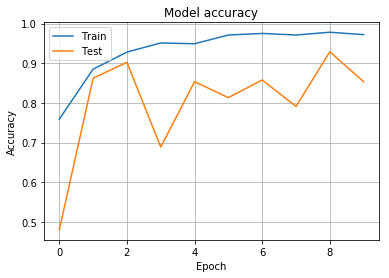

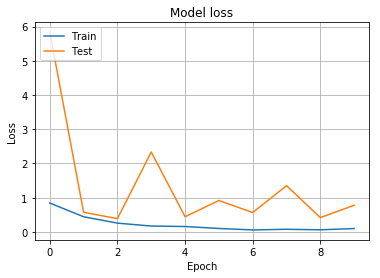

In [36]:
history = model.fit(x_train, y_train, batch_size=25, epochs=10, verbose=1, validation_data=(x_test, y_test), callbacks=callbacks_list)


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

# Plot loss history
#plt.plot(loss_history.lr)
#plt.title('loss history')
#plt.ylabel('loss')
#plt.xlabel('Epoch')
#plt.grid()
#plt.show()

In [40]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

225/225 [==============================] - ETA: 41 - ETA: 32 - ETA: 22 - ETA: 15 - ETA: 9 - ETA:  - ETA:  - 35s 155ms/step
Test loss: 0.7788653644360601
Test accuracy: 0.8533333333333334


In [41]:
score[1]

0.8533333333333334

[[1.7224021e-04 1.8893168e-05 2.7232963e-04 1.3245386e-03 7.3750857e-06
  3.2696889e-06 2.0491634e-06 9.9793053e-01 1.3707156e-06 2.6728783e-04]]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


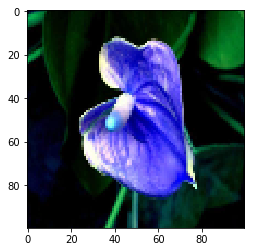

In [45]:
import matplotlib.pyplot as plt
img1=x_test[220]
img = np.reshape(img1,[1,100,100,3])
print(model.predict(img))
print(y_test[220])
plt.imshow(img1)

In [46]:
model.save("model.h5")

In [47]:
from keras.models import load_model
model = load_model('model.h5')
model.summary()
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 3, 3, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 7,047,754
Trainable params: 6,964,106
Non-trainable params: 83,648
_________________________________________________________________
225/225 [==============================] - ETA: 2:08:5 - ETA: 1:07:2 - ETA: 37:21  - ETA: 22:1 - ETA: 12:0 - ETA: 5:0 - ETA: 8s - 1842s 8s/step
Test loss: 0.7788653644360601
Test accuracy: 0.8533333333333334


In [ ]:
import matplotlib.pyplot as plt
img1=x_test[220]
img = np.reshape(img1,[1,100,100,3])
print(model.predict(img))
print(y_test[220])
plt.imshow(img1)

In [ ]:
WARNING:tensorflow:From C:\Users\JONUMHILLS\Anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
Train on 1000 samples, validate on 225 samples
Epoch 1/10
1000/1000 [==============================] - ETA: 4:03:17 - loss: 3.0963 - acc: 0.08 - ETA: 2:10:49 - loss: 2.4194 - acc: 0.20 - ETA: 1:29:33 - loss: 2.1472 - acc: 0.29 - ETA: 1:07:21 - loss: 1.7926 - acc: 0.42 - ETA: 53:41 - loss: 1.6643 - acc: 0.4800 - ETA: 44:04 - loss: 1.5760 - acc: 0.50 - ETA: 37:32 - loss: 1.4368 - acc: 0.56 - ETA: 32:23 - loss: 1.3525 - acc: 0.57 - ETA: 28:41 - loss: 1.3180 - acc: 0.58 - ETA: 25:31 - loss: 1.2343 - acc: 0.61 - ETA: 22:46 - loss: 1.1689 - acc: 0.63 - ETA: 20:22 - loss: 1.1322 - acc: 0.64 - ETA: 18:19 - loss: 1.1428 - acc: 0.65 - ETA: 16:31 - loss: 1.0987 - acc: 0.66 - ETA: 15:03 - loss: 1.0541 - acc: 0.67 - ETA: 13:43 - loss: 1.0237 - acc: 0.68 - ETA: 12:30 - loss: 0.9878 - acc: 0.68 - ETA: 11:25 - loss: 0.9847 - acc: 0.69 - ETA: 10:25 - loss: 0.9532 - acc: 0.69 - ETA: 9:34 - loss: 0.9242 - acc: 0.7100 - ETA: 8:46 - loss: 0.9421 - acc: 0.710 - ETA: 8:01 - loss: 0.9832 - acc: 0.705 - ETA: 7:19 - loss: 0.9626 - acc: 0.711 - ETA: 6:41 - loss: 0.9508 - acc: 0.713 - ETA: 6:05 - loss: 0.9389 - acc: 0.718 - ETA: 5:31 - loss: 0.9312 - acc: 0.723 - ETA: 4:59 - loss: 0.9180 - acc: 0.725 - ETA: 4:28 - loss: 0.8955 - acc: 0.734 - ETA: 3:59 - loss: 0.9027 - acc: 0.736 - ETA: 3:32 - loss: 0.9156 - acc: 0.738 - ETA: 3:07 - loss: 0.9073 - acc: 0.740 - ETA: 2:42 - loss: 0.9129 - acc: 0.741 - ETA: 2:19 - loss: 0.8978 - acc: 0.744 - ETA: 1:56 - loss: 0.8898 - acc: 0.744 - ETA: 1:35 - loss: 0.8719 - acc: 0.748 - ETA: 1:14 - loss: 0.8745 - acc: 0.748 - ETA: 54s - loss: 0.8661 - acc: 0.753 - ETA: 35s - loss: 0.8688 - acc: 0.75 - ETA: 17s - loss: 0.8560 - acc: 0.75 - 1234s 1s/step - loss: 0.8443 - acc: 0.7590 - val_loss: 5.8339 - val_acc: 0.4800

Epoch 00001: val_acc improved from -inf to 0.48000, saving model to weights.best_va.hdf5

Epoch 00001: val_loss improved from inf to 5.83388, saving model to weights.best_vl.hdf5
Epoch 2/10
1000/1000 [==============================] - ETA: 8:25:28 - loss: 0.4145 - acc: 0.84 - ETA: 4:44:07 - loss: 0.2542 - acc: 0.90 - ETA: 3:16:44 - loss: 0.2171 - acc: 0.92 - ETA: 2:31:01 - loss: 0.2468 - acc: 0.90 - ETA: 1:59:21 - loss: 0.2981 - acc: 0.88 - ETA: 1:38:15 - loss: 0.3461 - acc: 0.87 - ETA: 1:23:24 - loss: 0.4563 - acc: 0.85 - ETA: 1:11:27 - loss: 0.5178 - acc: 0.85 - ETA: 1:02:02 - loss: 0.4794 - acc: 0.86 - ETA: 54:25 - loss: 0.5139 - acc: 0.8520 - ETA: 48:18 - loss: 0.5567 - acc: 0.85 - ETA: 43:00 - loss: 0.5391 - acc: 0.85 - ETA: 38:31 - loss: 0.5294 - acc: 0.85 - ETA: 34:37 - loss: 0.5443 - acc: 0.85 - ETA: 31:15 - loss: 0.5222 - acc: 0.85 - ETA: 28:22 - loss: 0.5280 - acc: 0.85 - ETA: 25:46 - loss: 0.5190 - acc: 0.85 - ETA: 23:25 - loss: 0.5276 - acc: 0.86 - ETA: 21:19 - loss: 0.5160 - acc: 0.86 - ETA: 19:27 - loss: 0.5025 - acc: 0.86 - ETA: 17:43 - loss: 0.4942 - acc: 0.86 - ETA: 16:06 - loss: 0.5131 - acc: 0.86 - ETA: 14:39 - loss: 0.4981 - acc: 0.86 - ETA: 13:18 - loss: 0.4858 - acc: 0.87 - ETA: 12:02 - loss: 0.4826 - acc: 0.87 - ETA: 10:51 - loss: 0.4686 - acc: 0.87 - ETA: 9:45 - loss: 0.4581 - acc: 0.8770 - ETA: 8:43 - loss: 0.4467 - acc: 0.880 - ETA: 7:46 - loss: 0.4382 - acc: 0.880 - ETA: 6:51 - loss: 0.4256 - acc: 0.882 - ETA: 6:00 - loss: 0.4146 - acc: 0.885 - ETA: 5:11 - loss: 0.4082 - acc: 0.887 - ETA: 4:25 - loss: 0.4001 - acc: 0.889 - ETA: 3:41 - loss: 0.4120 - acc: 0.890 - ETA: 3:00 - loss: 0.4102 - acc: 0.891 - ETA: 2:20 - loss: 0.4199 - acc: 0.887 - ETA: 1:43 - loss: 0.4175 - acc: 0.888 - ETA: 1:07 - loss: 0.4154 - acc: 0.888 - ETA: 32s - loss: 0.4408 - acc: 0.886 - 1327s 1s/step - loss: 0.4432 - acc: 0.8850 - val_loss: 0.5743 - val_acc: 0.8622

Epoch 00002: val_acc improved from 0.48000 to 0.86222, saving model to weights.best_va.hdf5

Epoch 00002: val_loss improved from 5.83388 to 0.57428, saving model to weights.best_vl.hdf5
Epoch 3/10
1000/1000 [==============================] - ETA: 1:54:04 - loss: 0.1206 - acc: 0.96 - ETA: 1:03:33 - loss: 0.1439 - acc: 0.96 - ETA: 44:38 - loss: 0.2256 - acc: 0.8933 - ETA: 34:51 - loss: 0.2103 - acc: 0.89 - ETA: 28:26 - loss: 0.2774 - acc: 0.87 - ETA: 24:20 - loss: 0.2434 - acc: 0.89 - ETA: 21:52 - loss: 0.2202 - acc: 0.90 - ETA: 19:12 - loss: 0.2114 - acc: 0.91 - ETA: 16:57 - loss: 0.2910 - acc: 0.90 - ETA: 15:12 - loss: 0.2935 - acc: 0.91 - ETA: 13:42 - loss: 0.2688 - acc: 0.92 - ETA: 12:28 - loss: 0.2584 - acc: 0.92 - ETA: 11:25 - loss: 0.2644 - acc: 0.91 - ETA: 10:25 - loss: 0.2491 - acc: 0.92 - ETA: 9:32 - loss: 0.2671 - acc: 0.9173 - ETA: 8:44 - loss: 0.2641 - acc: 0.917 - ETA: 8:02 - loss: 0.2493 - acc: 0.922 - ETA: 7:22 - loss: 0.2687 - acc: 0.920 - ETA: 6:46 - loss: 0.2935 - acc: 0.909 - ETA: 6:14 - loss: 0.2801 - acc: 0.914 - ETA: 5:46 - loss: 0.2709 - acc: 0.916 - ETA: 5:17 - loss: 0.2626 - acc: 0.920 - ETA: 4:50 - loss: 0.2611 - acc: 0.920 - ETA: 4:26 - loss: 0.2536 - acc: 0.923 - ETA: 4:02 - loss: 0.2451 - acc: 0.926 - ETA: 3:40 - loss: 0.2415 - acc: 0.927 - ETA: 3:20 - loss: 0.2576 - acc: 0.925 - ETA: 3:01 - loss: 0.2514 - acc: 0.928 - ETA: 2:42 - loss: 0.2538 - acc: 0.926 - ETA: 2:25 - loss: 0.2688 - acc: 0.924 - ETA: 2:08 - loss: 0.2620 - acc: 0.926 - ETA: 1:51 - loss: 0.2847 - acc: 0.922 - ETA: 1:35 - loss: 0.2817 - acc: 0.922 - ETA: 1:20 - loss: 0.2742 - acc: 0.924 - ETA: 1:06 - loss: 0.2682 - acc: 0.926 - ETA: 52s - loss: 0.2614 - acc: 0.928 - ETA: 38s - loss: 0.2578 - acc: 0.92 - ETA: 25s - loss: 0.2532 - acc: 0.93 - ETA: 12s - loss: 0.2575 - acc: 0.92 - 532s 532ms/step - loss: 0.2578 - acc: 0.9280 - val_loss: 0.3876 - val_acc: 0.9022

Epoch 00003: val_acc improved from 0.86222 to 0.90222, saving model to weights.best_va.hdf5

Epoch 00003: val_loss improved from 0.57428 to 0.38759, saving model to weights.best_vl.hdf5
Epoch 4/10
1000/1000 [==============================] - ETA: 29:36 - loss: 0.0562 - acc: 1.00 - ETA: 21:00 - loss: 0.0898 - acc: 0.96 - ETA: 18:56 - loss: 0.0881 - acc: 0.96 - ETA: 15:46 - loss: 0.0721 - acc: 0.97 - ETA: 13:10 - loss: 0.0686 - acc: 0.97 - ETA: 11:20 - loss: 0.0652 - acc: 0.98 - ETA: 9:54 - loss: 0.0578 - acc: 0.9829 - ETA: 8:49 - loss: 0.0547 - acc: 0.985 - ETA: 7:57 - loss: 0.0571 - acc: 0.982 - ETA: 7:15 - loss: 0.0794 - acc: 0.976 - ETA: 6:38 - loss: 0.0959 - acc: 0.970 - ETA: 6:10 - loss: 0.1701 - acc: 0.963 - ETA: 5:42 - loss: 0.1590 - acc: 0.966 - ETA: 5:18 - loss: 0.1762 - acc: 0.962 - ETA: 4:55 - loss: 0.1711 - acc: 0.962 - ETA: 4:34 - loss: 0.1836 - acc: 0.955 - ETA: 4:14 - loss: 0.1769 - acc: 0.955 - ETA: 3:57 - loss: 0.1681 - acc: 0.957 - ETA: 3:40 - loss: 0.1680 - acc: 0.957 - ETA: 3:25 - loss: 0.1723 - acc: 0.956 - ETA: 3:19 - loss: 0.1814 - acc: 0.952 - ETA: 3:05 - loss: 0.1745 - acc: 0.954 - ETA: 2:51 - loss: 0.1689 - acc: 0.954 - ETA: 2:39 - loss: 0.1657 - acc: 0.955 - ETA: 2:27 - loss: 0.1592 - acc: 0.956 - ETA: 2:14 - loss: 0.1619 - acc: 0.956 - ETA: 2:03 - loss: 0.1604 - acc: 0.955 - ETA: 1:52 - loss: 0.1683 - acc: 0.954 - ETA: 1:41 - loss: 0.1653 - acc: 0.954 - ETA: 1:31 - loss: 0.1686 - acc: 0.953 - ETA: 1:20 - loss: 0.1681 - acc: 0.952 - ETA: 1:10 - loss: 0.1670 - acc: 0.952 - ETA: 1:00 - loss: 0.1666 - acc: 0.951 - ETA: 51s - loss: 0.1687 - acc: 0.949 - ETA: 42s - loss: 0.1650 - acc: 0.95 - ETA: 33s - loss: 0.1619 - acc: 0.95 - ETA: 24s - loss: 0.1771 - acc: 0.94 - ETA: 16s - loss: 0.1752 - acc: 0.94 - ETA: 8s - loss: 0.1753 - acc: 0.9497 - 355s 355ms/step - loss: 0.1724 - acc: 0.9510 - val_loss: 2.3366 - val_acc: 0.6889

Epoch 00004: val_acc did not improve from 0.90222

Epoch 00004: val_loss did not improve from 0.38759
Epoch 5/10
1000/1000 [==============================] - ETA: 5:16 - loss: 0.0554 - acc: 0.960 - ETA: 4:21 - loss: 0.0780 - acc: 0.960 - ETA: 4:05 - loss: 0.1391 - acc: 0.933 - ETA: 3:47 - loss: 0.1238 - acc: 0.940 - ETA: 3:32 - loss: 0.1008 - acc: 0.952 - ETA: 3:32 - loss: 0.1131 - acc: 0.946 - ETA: 3:21 - loss: 0.1313 - acc: 0.948 - ETA: 3:15 - loss: 0.1266 - acc: 0.950 - ETA: 3:05 - loss: 0.1671 - acc: 0.937 - ETA: 2:53 - loss: 0.1584 - acc: 0.940 - ETA: 2:44 - loss: 0.1451 - acc: 0.945 - ETA: 2:35 - loss: 0.1496 - acc: 0.943 - ETA: 2:26 - loss: 0.1612 - acc: 0.944 - ETA: 2:19 - loss: 0.1640 - acc: 0.945 - ETA: 2:12 - loss: 0.1735 - acc: 0.944 - ETA: 2:05 - loss: 0.1702 - acc: 0.942 - ETA: 1:59 - loss: 0.1888 - acc: 0.936 - ETA: 1:52 - loss: 0.1786 - acc: 0.940 - ETA: 1:46 - loss: 0.1830 - acc: 0.938 - ETA: 1:40 - loss: 0.1906 - acc: 0.938 - ETA: 1:34 - loss: 0.1824 - acc: 0.941 - ETA: 1:29 - loss: 0.1809 - acc: 0.940 - ETA: 1:23 - loss: 0.1789 - acc: 0.939 - ETA: 1:18 - loss: 0.1785 - acc: 0.940 - ETA: 1:13 - loss: 0.1843 - acc: 0.937 - ETA: 1:08 - loss: 0.1795 - acc: 0.940 - ETA: 1:03 - loss: 0.1735 - acc: 0.942 - ETA: 58s - loss: 0.1685 - acc: 0.944 - ETA: 53s - loss: 0.1661 - acc: 0.94 - ETA: 48s - loss: 0.1640 - acc: 0.94 - ETA: 43s - loss: 0.1615 - acc: 0.94 - ETA: 38s - loss: 0.1570 - acc: 0.94 - ETA: 33s - loss: 0.1700 - acc: 0.94 - ETA: 28s - loss: 0.1657 - acc: 0.94 - ETA: 23s - loss: 0.1714 - acc: 0.94 - ETA: 19s - loss: 0.1694 - acc: 0.94 - ETA: 14s - loss: 0.1663 - acc: 0.94 - ETA: 9s - loss: 0.1640 - acc: 0.9484 - ETA: 4s - loss: 0.1619 - acc: 0.948 - 206s 206ms/step - loss: 0.1591 - acc: 0.9490 - val_loss: 0.4450 - val_acc: 0.8533

Epoch 00005: val_acc did not improve from 0.90222

Epoch 00005: val_loss did not improve from 0.38759
Epoch 6/10
1000/1000 [==============================] - ETA: 3:25 - loss: 0.2745 - acc: 0.920 - ETA: 2:56 - loss: 0.1392 - acc: 0.960 - ETA: 2:42 - loss: 0.1071 - acc: 0.973 - ETA: 2:33 - loss: 0.0922 - acc: 0.980 - ETA: 2:25 - loss: 0.0917 - acc: 0.976 - ETA: 2:19 - loss: 0.0964 - acc: 0.973 - ETA: 2:14 - loss: 0.0842 - acc: 0.977 - ETA: 2:09 - loss: 0.0845 - acc: 0.980 - ETA: 2:05 - loss: 0.0763 - acc: 0.982 - ETA: 2:00 - loss: 0.0782 - acc: 0.980 - ETA: 1:57 - loss: 0.0889 - acc: 0.978 - ETA: 1:52 - loss: 0.1009 - acc: 0.976 - ETA: 1:49 - loss: 0.1022 - acc: 0.975 - ETA: 1:45 - loss: 0.1060 - acc: 0.971 - ETA: 1:40 - loss: 0.1178 - acc: 0.968 - ETA: 1:37 - loss: 0.1117 - acc: 0.970 - ETA: 1:33 - loss: 0.1055 - acc: 0.971 - ETA: 1:30 - loss: 0.1013 - acc: 0.973 - ETA: 1:26 - loss: 0.0963 - acc: 0.974 - ETA: 1:22 - loss: 0.0939 - acc: 0.974 - ETA: 1:18 - loss: 0.1036 - acc: 0.971 - ETA: 1:13 - loss: 0.1014 - acc: 0.970 - ETA: 1:09 - loss: 0.0972 - acc: 0.972 - ETA: 1:05 - loss: 0.1017 - acc: 0.970 - ETA: 1:01 - loss: 0.1147 - acc: 0.968 - ETA: 57s - loss: 0.1121 - acc: 0.969 - ETA: 53s - loss: 0.1087 - acc: 0.97 - ETA: 49s - loss: 0.1051 - acc: 0.97 - ETA: 45s - loss: 0.1069 - acc: 0.97 - ETA: 41s - loss: 0.1065 - acc: 0.97 - ETA: 37s - loss: 0.1072 - acc: 0.97 - ETA: 33s - loss: 0.1041 - acc: 0.97 - ETA: 28s - loss: 0.1039 - acc: 0.97 - ETA: 24s - loss: 0.1029 - acc: 0.97 - ETA: 20s - loss: 0.1009 - acc: 0.97 - ETA: 16s - loss: 0.0986 - acc: 0.97 - ETA: 12s - loss: 0.0963 - acc: 0.97 - ETA: 8s - loss: 0.0987 - acc: 0.9716 - ETA: 4s - loss: 0.0981 - acc: 0.971 - 183s 183ms/step - loss: 0.1013 - acc: 0.9710 - val_loss: 0.9187 - val_acc: 0.8133

Epoch 00006: val_acc did not improve from 0.90222

Epoch 00006: val_loss did not improve from 0.38759
Epoch 7/10
1000/1000 [==============================] - ETA: 2:47 - loss: 0.0083 - acc: 1.000 - ETA: 2:40 - loss: 0.0106 - acc: 1.000 - ETA: 2:34 - loss: 0.0122 - acc: 1.000 - ETA: 2:27 - loss: 0.0117 - acc: 1.000 - ETA: 2:24 - loss: 0.0127 - acc: 1.000 - ETA: 2:17 - loss: 0.0124 - acc: 1.000 - ETA: 2:12 - loss: 0.0276 - acc: 0.988 - ETA: 2:08 - loss: 0.0255 - acc: 0.990 - ETA: 2:03 - loss: 0.0235 - acc: 0.991 - ETA: 1:59 - loss: 0.0259 - acc: 0.992 - ETA: 1:54 - loss: 0.0236 - acc: 0.992 - ETA: 1:50 - loss: 0.0233 - acc: 0.993 - ETA: 1:46 - loss: 0.0217 - acc: 0.993 - ETA: 1:42 - loss: 0.0203 - acc: 0.994 - ETA: 1:38 - loss: 0.0196 - acc: 0.994 - ETA: 1:35 - loss: 0.0202 - acc: 0.995 - ETA: 1:32 - loss: 0.0191 - acc: 0.995 - ETA: 1:27 - loss: 0.0185 - acc: 0.995 - ETA: 1:23 - loss: 0.0208 - acc: 0.993 - ETA: 1:20 - loss: 0.0201 - acc: 0.994 - ETA: 1:16 - loss: 0.0219 - acc: 0.994 - ETA: 1:12 - loss: 0.0261 - acc: 0.990 - ETA: 1:08 - loss: 0.0271 - acc: 0.989 - ETA: 1:04 - loss: 0.0263 - acc: 0.990 - ETA: 1:00 - loss: 0.0270 - acc: 0.988 - ETA: 56s - loss: 0.0348 - acc: 0.983 - ETA: 51s - loss: 0.0373 - acc: 0.98 - ETA: 48s - loss: 0.0366 - acc: 0.98 - ETA: 44s - loss: 0.0375 - acc: 0.98 - ETA: 39s - loss: 0.0467 - acc: 0.97 - ETA: 35s - loss: 0.0454 - acc: 0.97 - ETA: 32s - loss: 0.0509 - acc: 0.97 - ETA: 28s - loss: 0.0502 - acc: 0.97 - ETA: 24s - loss: 0.0494 - acc: 0.97 - ETA: 20s - loss: 0.0482 - acc: 0.97 - ETA: 16s - loss: 0.0473 - acc: 0.97 - ETA: 12s - loss: 0.0502 - acc: 0.97 - ETA: 8s - loss: 0.0592 - acc: 0.9747 - ETA: 4s - loss: 0.0605 - acc: 0.974 - 194s 194ms/step - loss: 0.0592 - acc: 0.9750 - val_loss: 0.5672 - val_acc: 0.8578

Epoch 00007: val_acc did not improve from 0.90222

Epoch 00007: val_loss did not improve from 0.38759
Epoch 8/10
1000/1000 [==============================] - ETA: 3:58 - loss: 0.0022 - acc: 1.000 - ETA: 3:20 - loss: 0.0034 - acc: 1.000 - ETA: 2:58 - loss: 0.0541 - acc: 0.973 - ETA: 2:46 - loss: 0.0418 - acc: 0.980 - ETA: 2:37 - loss: 0.0343 - acc: 0.984 - ETA: 2:31 - loss: 0.0322 - acc: 0.986 - ETA: 2:24 - loss: 0.0778 - acc: 0.977 - ETA: 2:26 - loss: 0.0762 - acc: 0.975 - ETA: 2:24 - loss: 0.0706 - acc: 0.977 - ETA: 2:19 - loss: 0.0644 - acc: 0.980 - ETA: 2:17 - loss: 0.0662 - acc: 0.978 - ETA: 2:13 - loss: 0.0670 - acc: 0.980 - ETA: 2:18 - loss: 0.0619 - acc: 0.981 - ETA: 2:13 - loss: 0.0644 - acc: 0.980 - ETA: 2:07 - loss: 0.0603 - acc: 0.981 - ETA: 2:02 - loss: 0.0624 - acc: 0.980 - ETA: 1:56 - loss: 0.0616 - acc: 0.978 - ETA: 1:51 - loss: 0.0638 - acc: 0.977 - ETA: 1:45 - loss: 0.0606 - acc: 0.978 - ETA: 1:39 - loss: 0.0592 - acc: 0.978 - ETA: 1:34 - loss: 0.0636 - acc: 0.977 - ETA: 1:29 - loss: 0.0651 - acc: 0.974 - ETA: 1:23 - loss: 0.0632 - acc: 0.975 - ETA: 1:18 - loss: 0.0630 - acc: 0.975 - ETA: 1:13 - loss: 0.0628 - acc: 0.974 - ETA: 1:08 - loss: 0.0606 - acc: 0.975 - ETA: 1:03 - loss: 0.0591 - acc: 0.976 - ETA: 59s - loss: 0.0617 - acc: 0.974 - ETA: 54s - loss: 0.0693 - acc: 0.97 - ETA: 49s - loss: 0.0699 - acc: 0.97 - ETA: 44s - loss: 0.0823 - acc: 0.97 - ETA: 39s - loss: 0.0798 - acc: 0.97 - ETA: 34s - loss: 0.0839 - acc: 0.96 - ETA: 29s - loss: 0.0819 - acc: 0.97 - ETA: 24s - loss: 0.0816 - acc: 0.97 - ETA: 20s - loss: 0.0801 - acc: 0.97 - ETA: 15s - loss: 0.0813 - acc: 0.96 - ETA: 10s - loss: 0.0794 - acc: 0.97 - ETA: 5s - loss: 0.0797 - acc: 0.9703 - 232s 232ms/step - loss: 0.0779 - acc: 0.9710 - val_loss: 1.3523 - val_acc: 0.7911

Epoch 00008: val_acc did not improve from 0.90222

Epoch 00008: val_loss did not improve from 0.38759
Epoch 9/10
1000/1000 [==============================] - ETA: 3:55 - loss: 0.0120 - acc: 1.000 - ETA: 3:23 - loss: 0.0257 - acc: 0.980 - ETA: 3:15 - loss: 0.0286 - acc: 0.986 - ETA: 3:07 - loss: 0.0217 - acc: 0.990 - ETA: 2:54 - loss: 0.0205 - acc: 0.992 - ETA: 2:44 - loss: 0.0572 - acc: 0.986 - ETA: 2:36 - loss: 0.0554 - acc: 0.982 - ETA: 2:28 - loss: 0.0558 - acc: 0.980 - ETA: 2:21 - loss: 0.0545 - acc: 0.982 - ETA: 2:14 - loss: 0.0576 - acc: 0.980 - ETA: 2:08 - loss: 0.0529 - acc: 0.981 - ETA: 2:03 - loss: 0.0486 - acc: 0.983 - ETA: 2:02 - loss: 0.0641 - acc: 0.978 - ETA: 1:56 - loss: 0.0617 - acc: 0.980 - ETA: 1:52 - loss: 0.0700 - acc: 0.976 - ETA: 1:46 - loss: 0.0658 - acc: 0.977 - ETA: 1:41 - loss: 0.0733 - acc: 0.976 - ETA: 1:36 - loss: 0.0692 - acc: 0.977 - ETA: 1:32 - loss: 0.0665 - acc: 0.978 - ETA: 1:27 - loss: 0.0720 - acc: 0.976 - ETA: 1:22 - loss: 0.0736 - acc: 0.975 - ETA: 1:17 - loss: 0.0706 - acc: 0.976 - ETA: 1:13 - loss: 0.0680 - acc: 0.977 - ETA: 1:09 - loss: 0.0671 - acc: 0.978 - ETA: 1:04 - loss: 0.0670 - acc: 0.977 - ETA: 1:00 - loss: 0.0661 - acc: 0.976 - ETA: 57s - loss: 0.0639 - acc: 0.977 - ETA: 53s - loss: 0.0631 - acc: 0.97 - ETA: 49s - loss: 0.0696 - acc: 0.97 - ETA: 44s - loss: 0.0692 - acc: 0.97 - ETA: 39s - loss: 0.0691 - acc: 0.97 - ETA: 35s - loss: 0.0717 - acc: 0.97 - ETA: 30s - loss: 0.0700 - acc: 0.97 - ETA: 26s - loss: 0.0683 - acc: 0.97 - ETA: 21s - loss: 0.0672 - acc: 0.97 - ETA: 17s - loss: 0.0666 - acc: 0.97 - ETA: 13s - loss: 0.0652 - acc: 0.97 - ETA: 8s - loss: 0.0635 - acc: 0.9779 - ETA: 4s - loss: 0.0622 - acc: 0.978 - 193s 193ms/step - loss: 0.0627 - acc: 0.9780 - val_loss: 0.4185 - val_acc: 0.9289

Epoch 00009: val_acc improved from 0.90222 to 0.92889, saving model to weights.best_va.hdf5

Epoch 00009: val_loss did not improve from 0.38759
Epoch 10/10
1000/1000 [==============================] - ETA: 5:30 - loss: 0.0385 - acc: 1.000 - ETA: 4:16 - loss: 0.0408 - acc: 1.000 - ETA: 3:45 - loss: 0.0281 - acc: 1.000 - ETA: 3:34 - loss: 0.0230 - acc: 1.000 - ETA: 3:20 - loss: 0.0198 - acc: 1.000 - ETA: 3:14 - loss: 0.0407 - acc: 0.993 - ETA: 3:08 - loss: 0.0510 - acc: 0.982 - ETA: 3:05 - loss: 0.0451 - acc: 0.985 - ETA: 2:58 - loss: 0.0404 - acc: 0.986 - ETA: 2:50 - loss: 0.0410 - acc: 0.984 - ETA: 2:43 - loss: 0.0379 - acc: 0.985 - ETA: 2:35 - loss: 0.0349 - acc: 0.986 - ETA: 2:29 - loss: 0.0603 - acc: 0.981 - ETA: 2:28 - loss: 0.1279 - acc: 0.977 - ETA: 2:21 - loss: 0.1213 - acc: 0.978 - ETA: 2:15 - loss: 0.1190 - acc: 0.977 - ETA: 2:08 - loss: 0.1200 - acc: 0.976 - ETA: 2:04 - loss: 0.1206 - acc: 0.973 - ETA: 2:03 - loss: 0.1173 - acc: 0.974 - ETA: 1:56 - loss: 0.1118 - acc: 0.976 - ETA: 1:49 - loss: 0.1098 - acc: 0.975 - ETA: 1:43 - loss: 0.1057 - acc: 0.976 - ETA: 1:37 - loss: 0.1033 - acc: 0.977 - ETA: 1:31 - loss: 0.1088 - acc: 0.975 - ETA: 1:27 - loss: 0.1046 - acc: 0.976 - ETA: 1:21 - loss: 0.1110 - acc: 0.975 - ETA: 1:15 - loss: 0.1103 - acc: 0.974 - ETA: 1:08 - loss: 0.1071 - acc: 0.975 - ETA: 1:03 - loss: 0.1084 - acc: 0.973 - ETA: 56s - loss: 0.1099 - acc: 0.972 - ETA: 51s - loss: 0.1084 - acc: 0.97 - ETA: 45s - loss: 0.1099 - acc: 0.97 - ETA: 40s - loss: 0.1072 - acc: 0.97 - ETA: 34s - loss: 0.1041 - acc: 0.97 - ETA: 28s - loss: 0.1015 - acc: 0.97 - ETA: 23s - loss: 0.0992 - acc: 0.97 - ETA: 17s - loss: 0.0977 - acc: 0.97 - ETA: 11s - loss: 0.0955 - acc: 0.97 - ETA: 5s - loss: 0.0958 - acc: 0.9733 - 259s 259ms/step - loss: 0.0993 - acc: 0.9720 - val_loss: 0.7789 - val_acc: 0.8533

Epoch 00010: val_acc did not improve from 0.92889

Epoch 00010: val_loss did not improve from 0.38759